In [ ]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt
from sklearn.preprocessing import label_binarize

In [ ]:
# Incarcarea datelor
dataset_folder = "/content/drive/MyDrive/Tema_TIA/dataset3/dataset"

In [ ]:
# Functie pentru incarcarea imaginilor
def load_images_from_folder(folder):
    images = []
    labels = []
    file_paths = []
    class_mapping = {}
    for class_label, class_name in enumerate(os.listdir(folder)):
        class_mapping[class_label] = class_name
        subfolder_path = os.path.join(folder, class_name)
        for filename in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, filename)
            if os.path.isfile(image_path):
                image = imread(image_path)
                if len(image.shape) == 3:
                    image = resize(image, (64, 64, 3), anti_aliasing=True)
                else:
                    image = resize(image, (64, 64), anti_aliasing=True)
                images.append(image.flatten())
                labels.append(class_label)
                file_paths.append(image_path)
    return np.array(images), np.array(labels), file_paths, class_mapping

In [ ]:
# Functie pentru salvarea rezultatelor intr-un fisier CSV
def save_results(algorithm, y_true, y_pred, class_mapping, model_type):
    results = pd.DataFrame({'True Label': [class_mapping[label]
                                           for label in y_true], 'Predicted Label': [class_mapping[label] for label in y_pred]})
    results_folder = f"/content/drive/MyDrive/Tema_TIA/{model_type}_results"
    if not os.path.exists(results_folder):
        os.makedirs(results_folder)

    results_file = os.path.join(results_folder, f'{model_type}_results.csv')
    results.to_csv(results_file, index=False)
    print(f"Results saved for {algorithm} at {results_file}")

In [ ]:
# Functie pentru salvarea imaginilor
def save_test_images(algorithm, X_test, y_true, y_pred, class_mapping, model_type):
    results_folder = f"/content/drive/MyDrive/Tema_TIA/{model_type}_results"
    if not os.path.exists(results_folder):
        os.makedirs(results_folder)

    for idx, (true_label, pred_label) in enumerate(zip(y_true, y_pred)):
        image = X_test[idx].reshape(64, 64, -1)
        plt.imshow(image)
        plt.title(f'True Label: {class_mapping[true_label]}\nPredicted Label: {class_mapping[pred_label]}')
        plt.savefig(os.path.join(results_folder, f'{algorithm}_test_image_{idx}.png'))
        plt.close()

    print(f'Images saved for {algorithm} in {results_folder}')

In [ ]:
# Functie corectata pentru salvarea rezultatelor într-un fisier CSV
def save_results_to_csv(y_true, y_pred, class_mapping, filename, model_type):
    y_true_labels = [class_mapping[label] for label in y_true]
    y_pred_labels = [class_mapping[label] for label in y_pred]

    data = {
        'True Label': y_true_labels,
        'Predicted Label': y_pred_labels
    }

    results_folder = f"/content/drive/MyDrive/Tema_TIA/{model_type}_results"
    if not os.path.exists(results_folder):
        os.makedirs(results_folder)

    df = pd.DataFrame(data)
    df.to_csv(os.path.join(results_folder, filename), index=False)
    print(f"Results saved at {results_folder}/{filename}")

In [ ]:
X_train, y_train, train_file_paths, class_mapping = load_images_from_folder(dataset_folder)

# Impartirea setului de antrenament in antrenament si validare
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Impartirea datelor in antrenament si test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

Acuratețe (Validare Naive Bayes): 0.6556016597510373
Raport de clasificare (Validare Naive Bayes):
              precision    recall  f1-score   support

           0       0.66      0.64      0.65        98
           1       0.66      0.99      0.79        77
           2       0.61      0.29      0.39        66

    accuracy                           0.66       241
   macro avg       0.65      0.64      0.61       241
weighted avg       0.65      0.66      0.63       241

Acuratețe (Testare Naive Bayes): 0.7170731707317073
Raport de clasificare (Testare Naive Bayes):
              precision    recall  f1-score   support

           0       0.71      0.68      0.69        75
           1       0.76      0.93      0.84        74
           2       0.64      0.48      0.55        56

    accuracy                           0.72       205
   macro avg       0.70      0.70      0.69       205
weighted avg       0.71      0.72      0.71       205

Matrice de confuzie
[[51 13 11]
 [ 1 69  4

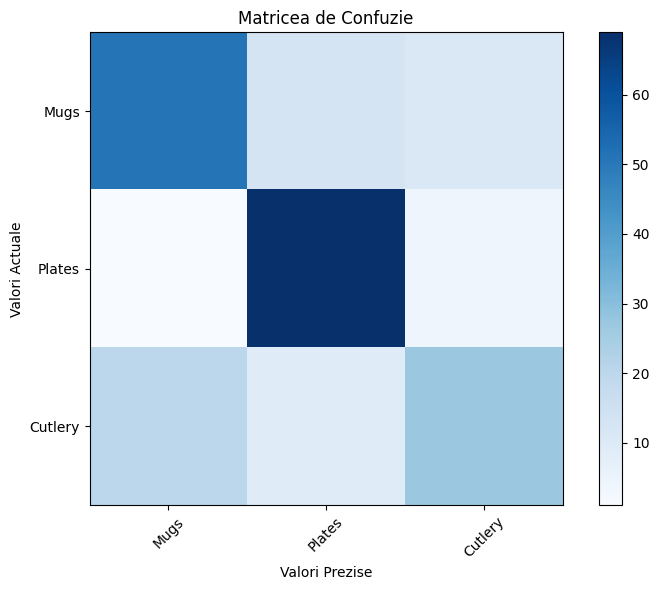

AUC pentru clasa 0 (Naive Bayes): 0.7852820512820513
AUC pentru clasa 1 (Naive Bayes): 0.898287600577677
AUC pentru clasa 2 (Naive Bayes): 0.7689357622243528


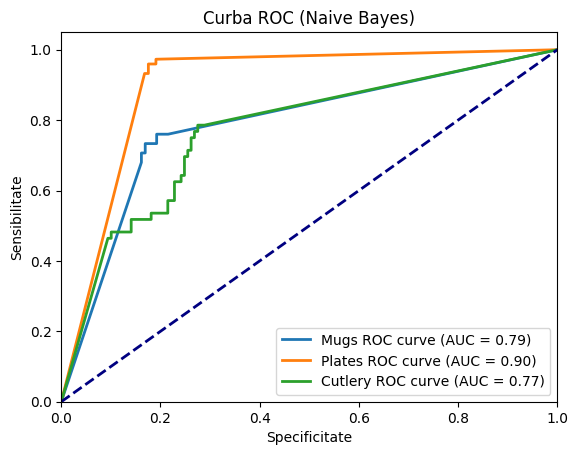

In [ ]:
# Crearea si antrenarea modelului Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predictii pe setul de validare
y_val_pred_nb = nb_classifier.predict(X_val)

# Evaluarea performantei pe setul de validare
print(f"Acuratețe (Validare Naive Bayes): {accuracy_score(y_val, y_val_pred_nb)}")
print("Raport de clasificare (Validare Naive Bayes):")
print(classification_report(y_val, y_val_pred_nb))

# Predictii pe setul de test
y_test_pred_nb = nb_classifier.predict(X_test)

# Evaluarea performantei pe setul de test
print(f"Acuratețe (Testare Naive Bayes): {accuracy_score(y_test, y_test_pred_nb)}")
print("Raport de clasificare (Testare Naive Bayes):")
print(classification_report(y_test, y_test_pred_nb))

# Matricea de confuzie pentru testare
print("Matrice de confuzie")
print(confusion_matrix(y_test, y_test_pred_nb))

# Crearea unui grafic pentru matricea de confuzie
conf_matrix = confusion_matrix(y_test, y_test_pred_nb)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matricea de Confuzie')
plt.colorbar()
tick_marks = np.arange(len(class_mapping))
plt.xticks(tick_marks, class_mapping.values(), rotation=45)
plt.yticks(tick_marks, class_mapping.values())
plt.ylabel('Valori Actuale')
plt.xlabel('Valori Prezise')
plt.tight_layout()
plt.show()

# Salvarea rezultatelor pentru Naive Bayes
#save_results_to_csv(y_val, y_val_pred_nb, class_mapping, "naive_bayes_results_validation.csv", "NaiveBayes")
#save_results_to_csv(y_test, y_test_pred_nb, class_mapping, "naive_bayes_results_test.csv", "NaiveBayes")

# Salvarea imaginilor pentru Naive Bayes
#save_test_images("NaiveBayes", X_test, y_test, y_test_pred_nb, class_mapping, "NaiveBayes")

# Binarizare etichetelor
#y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# ROC Curve pentru NB
fpr = {}
tpr = {}
roc_auc = {}

# ROC Curve pentru Naive Bayes
for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], nb_classifier.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(f"AUC pentru clasa {i} (Naive Bayes): {roc_auc[i]}")

# Plotare ROC curve pentru Naive Bayes
plt.figure()
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_mapping[i]} ROC curve (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificitate')
plt.ylabel('Sensibilitate')
plt.title('Curba ROC (Naive Bayes)')
plt.legend(loc='lower right')
plt.show()

Acuratețe (Validare KNN): 0.8713692946058091
Raport de clasificare (Validare KNN):
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        98
           1       0.81      0.97      0.88        77
           2       0.89      0.86      0.88        66

    accuracy                           0.87       241
   macro avg       0.88      0.88      0.87       241
weighted avg       0.88      0.87      0.87       241

Acuratețe (Testare KNN): 0.8292682926829268
Raport de clasificare (Testare KNN):
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        75
           1       0.86      0.91      0.88        74
           2       0.79      0.80      0.80        56

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205

Matrice de confuzie (Testare):
[[58  8  9]
 [ 4 67  3]
 [ 8  3 45]]


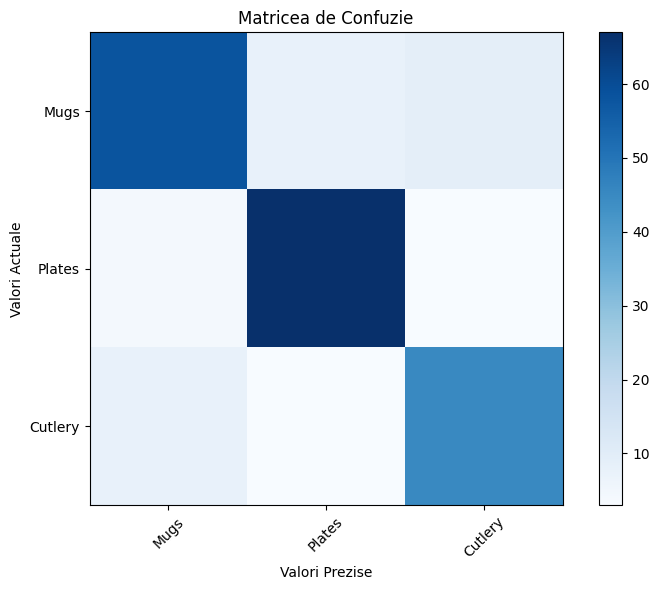

AUC pentru clasa 0 (KNN): 0.8991794871794873
AUC pentru clasa 1 (KNN): 0.958788941613369
AUC pentru clasa 2 (KNN): 0.927013422818792


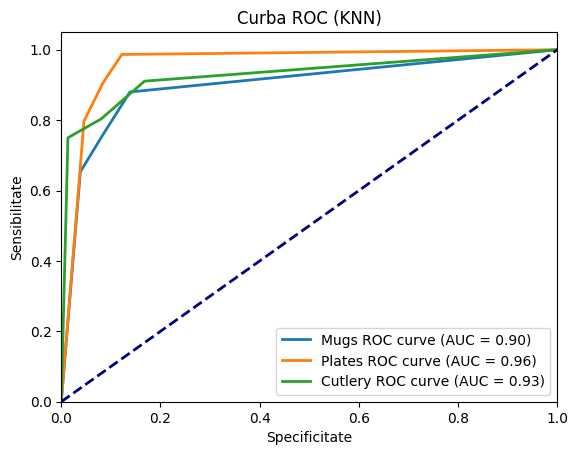

In [ ]:
# Crearea și antrenarea modelului KNN
knn_classifier = KNeighborsClassifier(n_neighbors=10)  # Parametru de număr de vecini
knn_classifier.fit(X_train, y_train)

# Predicții pe setul de validare
y_val_pred_knn = knn_classifier.predict(X_val)

# Evaluarea performanței pe setul de validare
print(f"Acuratețe (Validare KNN): {accuracy_score(y_val, y_val_pred_knn)}")
print("Raport de clasificare (Validare KNN):")
print(classification_report(y_val, y_val_pred_knn))

# Predicții pe setul de test
y_test_pred_knn = knn_classifier.predict(X_test)

# Evaluarea performantei pe setul de test
print(f"Acuratețe (Testare KNN): {accuracy_score(y_test, y_test_pred_knn)}")
print("Raport de clasificare (Testare KNN):")
print(classification_report(y_test, y_test_pred_knn))

# Matricea de confuzie pentru testare
print("Matrice de confuzie (Testare):")
print(confusion_matrix(y_test, y_test_pred_knn))

# Crearea unui grafic pentru matricea de confuzie
conf_matrix = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matricea de Confuzie')
plt.colorbar()
tick_marks = np.arange(len(class_mapping))
plt.xticks(tick_marks, class_mapping.values(), rotation=45)
plt.yticks(tick_marks, class_mapping.values())
plt.ylabel('Valori Actuale')
plt.xlabel('Valori Prezise')
plt.tight_layout()
plt.show()

# Salvarea rezultatelor pentru KNN
#save_results_to_csv(y_val, y_val_pred_knn, class_mapping, "KNN_results_validation.csv", "KNN")
#save_results_to_csv(y_test, y_test_pred_knn, class_mapping, "KNN_results_test.csv", "KNN")

# Salvarea imaginilor pentru KNN
#save_test_images("KNN", X_test, y_test, y_test_pred_knn, class_mapping, "KNN")

# Binarizare etichetelor
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# ROC Curve pentru KNN
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], knn_classifier.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(f"AUC pentru clasa {i} (KNN): {roc_auc[i]}")

# Plotare ROC curve pentru KNN
plt.figure()
for i in range(y_test_bin.shape[1]):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_mapping[i]} ROC curve (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Specificitate')
plt.ylabel('Sensibilitate')
plt.title('Curba ROC (KNN)')
plt.legend(loc='lower right')
plt.show()